# Exprotary question



# **Data Exploration** 

## <h3>Read Data Process</h3>

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# drive path of dataset

drivePath = "../dataset/raw/Student_dataset.csv";

In [20]:
# read dataset

df = pd.read_csv(drivePath);

df.head()

,Unnamed: 0,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,...,interested in games,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Suggested Job Role
0,0,69,63,78,87,94,94,87,84,61,...,no,Prayer books,salary,no,stubborn,Management,salary,hard worker,yes,Database Developer
1,1,78,62,73,60,71,70,73,84,91,...,yes,Childrens,salary,yes,gentle,Technical,salary,hard worker,no,Database Administrator
2,2,71,86,91,87,61,81,72,72,94,...,yes,Travel,Work,no,stubborn,Management,work,hard worker,no,Database Administrator
3,3,76,87,60,84,89,73,62,88,69,...,no,Romance,Work,yes,gentle,Management,work,smart worker,yes,Database Developer
4,4,92,62,90,67,71,89,73,71,73,...,yes,Cookbooks,salary,no,stubborn,Management,work,hard worker,yes,Systems Analyst


In [21]:
df.dtypes

Unnamed: 0                                   int64
Acedamic percentage in Operating Systems     int64
percentage in Algorithms                     int64
Percentage in Programming Concepts           int64
Percentage in Software Engineering           int64
Percentage in Computer Networks              int64
Percentage in Electronics Subjects           int64
Percentage in Computer Architecture          int64
Percentage in Mathematics                    int64
Percentage in Communication skills           int64
Hours working per day                        int64
Logical quotient rating                      int64
hackathons                                   int64
coding skills rating                         int64
public speaking points                       int64
can work long time before system?           object
self-learning capability?                   object
Extra-courses did                           object
certifications                              object
workshops                      

In [22]:
# rename columns

df.rename(columns = {'Acedamic percentage in Operating Systems': 'Percentage in Operating Systems'}, inplace = True)

df.rename(columns = {'percentage in Algorithms': 'Percentage in Algorithms'}, inplace = True)


## <h3>Academic Performance</h3>

In [23]:
academicColumns = [
    'Percentage in Operating Systems',
    'Percentage in Algorithms',
    'Percentage in Programming Concepts',
    'Percentage in Software Engineering',
    'Percentage in Computer Networks',
    'Percentage in Electronics Subjects',
    'Percentage in Computer Architecture',
    'Percentage in Mathematics',
    'Percentage in Communication skills',
]

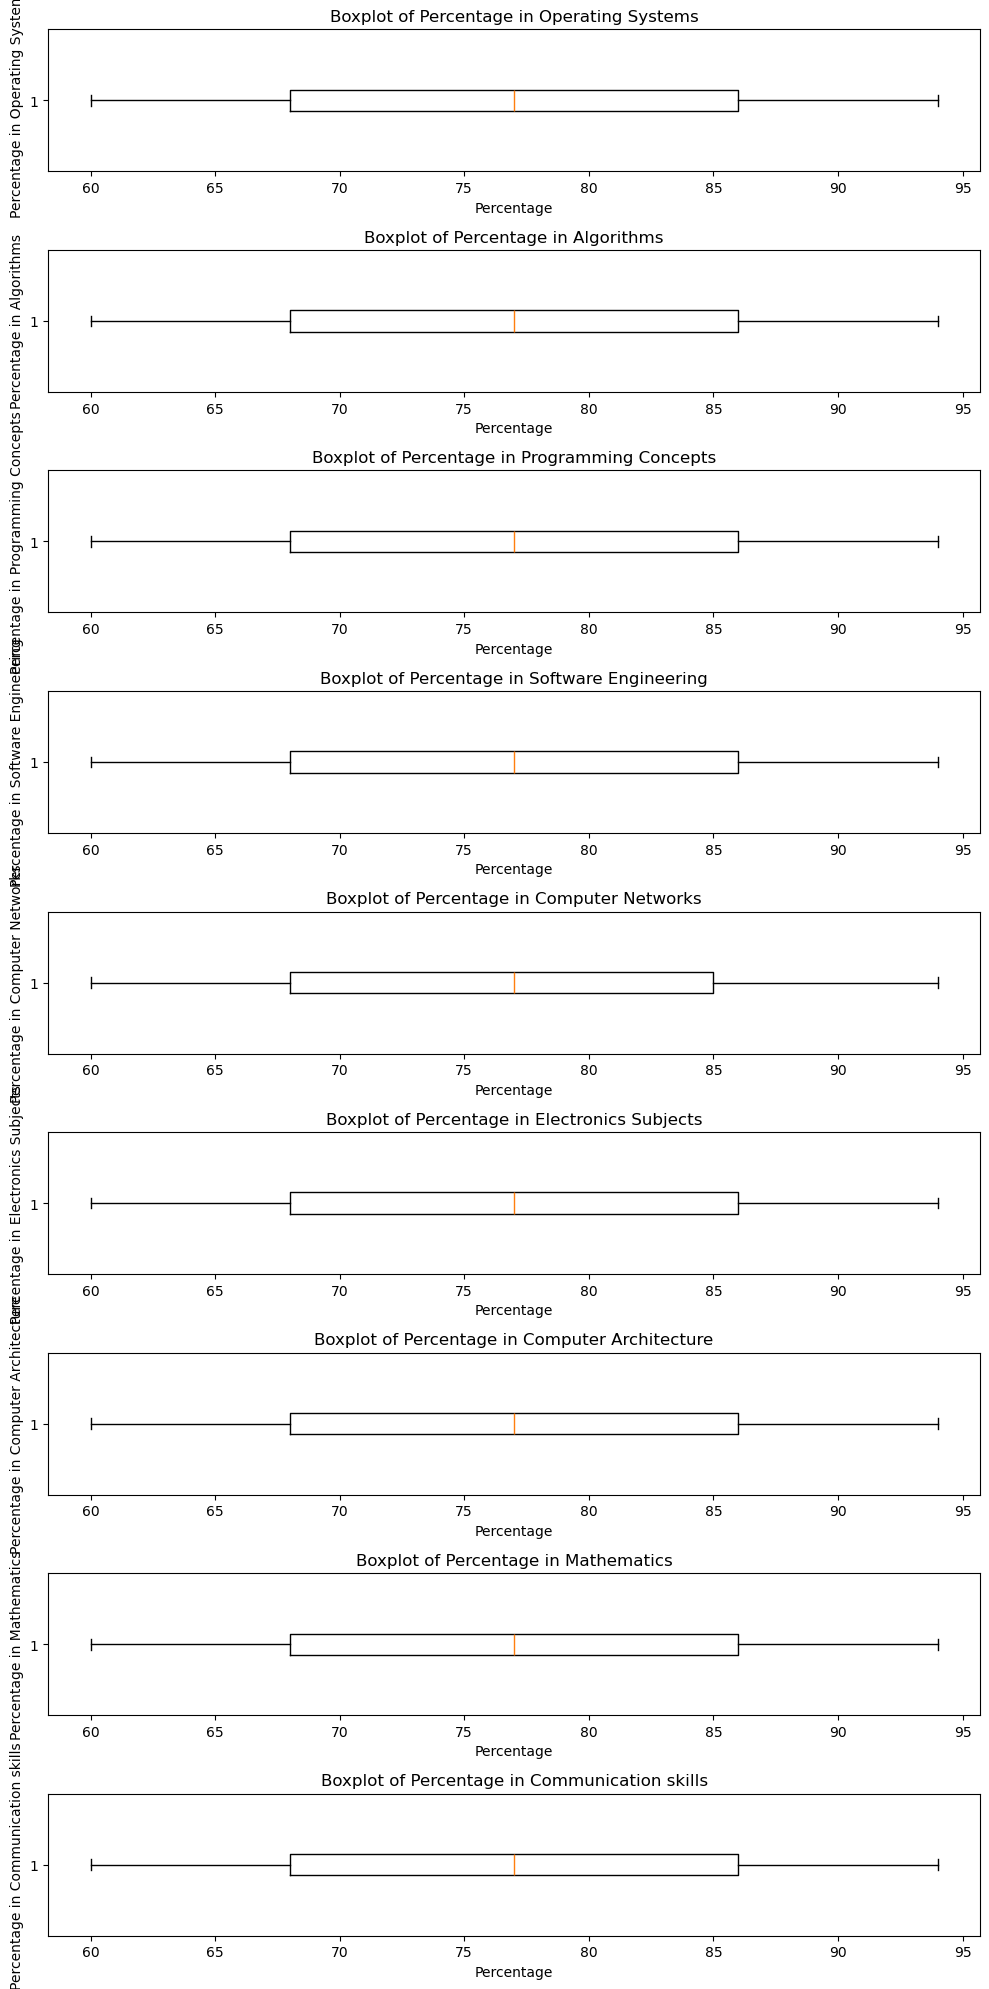

In [24]:
fig, axes = plt.subplots(nrows=len(academicColumns), ncols=1, figsize=(10, 20))

# Create a boxplot for each column and stack them vertically
for ax, column in zip(axes, academicColumns):
    ax.boxplot(df[column], vert=False)
    ax.set_title(f'Boxplot of {column}')
    ax.set_xlabel('Percentage')
    ax.set_ylabel(column)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

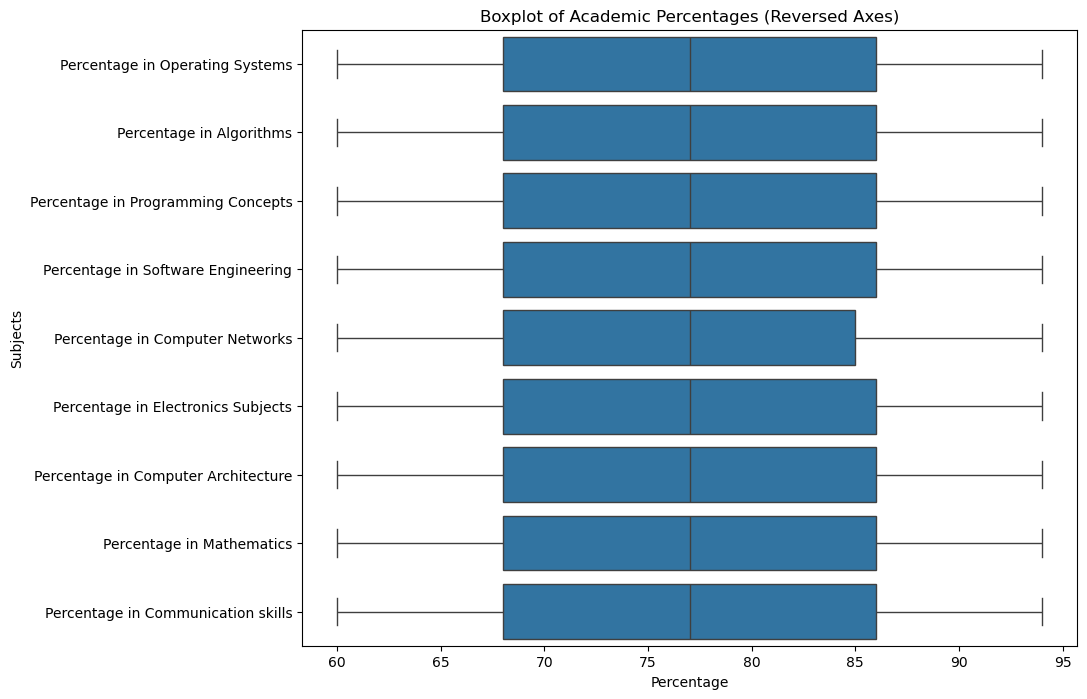

,Percentage in Operating Systems,Percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills
0,69,63,78,87,94,94,87,84,61
1,78,62,73,60,71,70,73,84,91
2,71,86,91,87,61,81,72,72,94
3,76,87,60,84,89,73,62,88,69
4,92,62,90,67,71,89,73,71,73


In [25]:
# Create a DataFrame
# academic-result data
academic_df = pd.DataFrame(df[academicColumns])

# Melt the DataFrame to long format for Seaborn
melted_df = academic_df.melt(var_name="Subjects", value_name="Percentage")

# Create the boxplot
plt.figure(figsize=(10, 8))  # Adjusted size for horizontal plot
sns.boxplot(data=melted_df, x="Percentage", y="Subjects", orient='h')  # Note 'orient="h"' for horizontal orientation
plt.title("Boxplot of Academic Percentages (Reversed Axes)")
plt.show()

academic_df.head()


count    20000.000000
mean         0.769934
std          0.033693
min          0.644444
25%          0.746667
50%          0.770000
75%          0.793333
max          0.892222
Name: Academic Normalize, dtype: float64
-----------------------------
IQR: 0.0467
Max IQR: 0.8633
Min IQR: 0.6767


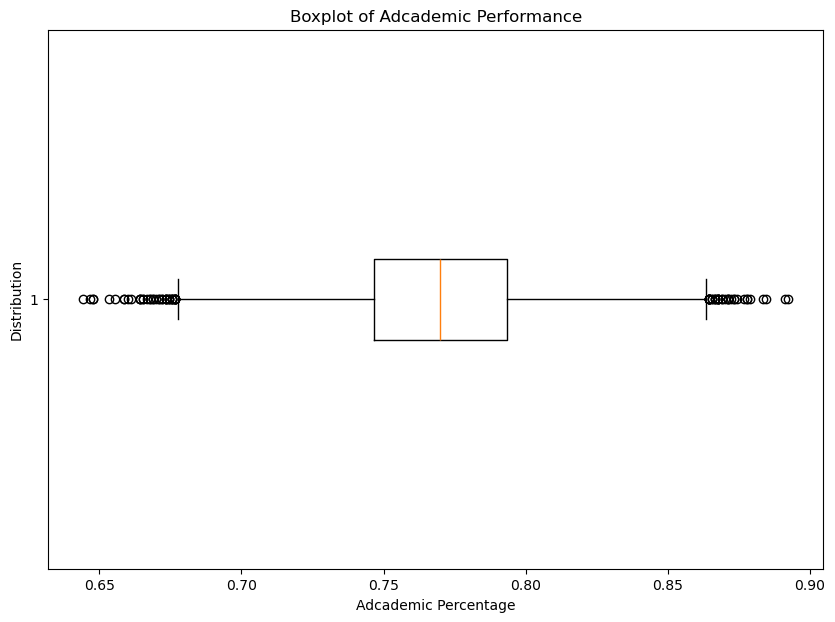

In [26]:
df.head()

# Sum the selected columns row by row and divide by 900 ,normalize the data
df['Academic Normalize'] = df[academicColumns].sum(axis=1) / 900
academic_df['Academic Normalize'] = df[academicColumns].sum(axis=1) / 900

# Display the DataFrame to verify the change
print(academic_df['Academic Normalize'].describe())

print("-----------------------------")

IQR = academic_df['Academic Normalize'].quantile(0.75) - academic_df['Academic Normalize'].quantile(0.25)

print(f"IQR: {IQR:.4f}")
max_IQR = academic_df['Academic Normalize'].quantile(0.75) + 1.5 * IQR
min_IQR = academic_df['Academic Normalize'].quantile(0.25) - 1.5 * IQR

print(f"Max IQR: {max_IQR:.4f}")
print(f"Min IQR: {min_IQR:.4f}")

fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.boxplot(academic_df['Academic Normalize'],vert=False)

# show plot
plt.xlabel('Adcademic Percentage')  # Naming the x-axis
plt.ylabel('Distribution')  # Naming the y-axis
plt.title('Boxplot of Adcademic Performance')

plt.show()



## <h3>Acceptance Daily Working Hours</h3>

In [27]:
# df["Hours working per day"]

df.head()
academic_df.head()

# print(df['Hours working per day'].describe())

,Percentage in Operating Systems,Percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Academic Normalize
0,69,63,78,87,94,94,87,84,61,0.796667
1,78,62,73,60,71,70,73,84,91,0.735556
2,71,86,91,87,61,81,72,72,94,0.794444
3,76,87,60,84,89,73,62,88,69,0.764444
4,92,62,90,67,71,89,73,71,73,0.764444


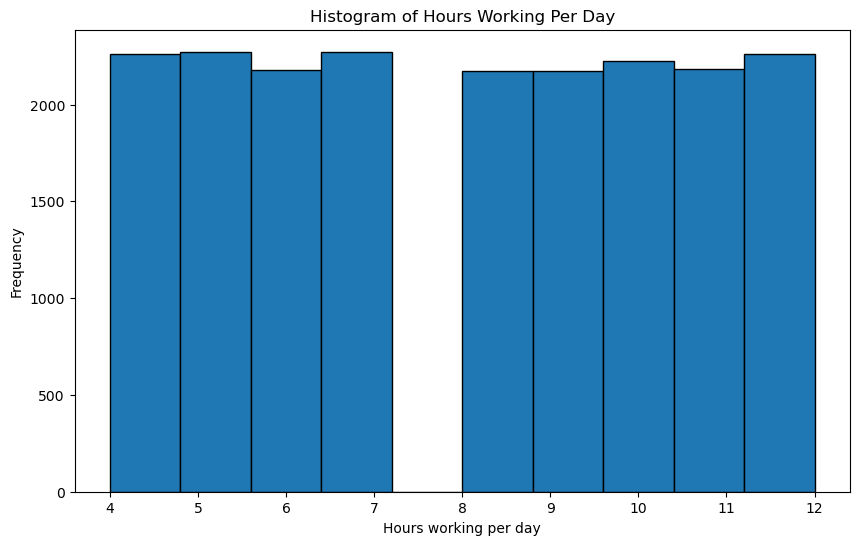

In [28]:
plt.figure(figsize=(10, 6))
plt.hist(df['Hours working per day'], bins=10, edgecolor='black')

# Add labels and title
plt.xlabel('Hours working per day')
plt.ylabel('Frequency')
plt.title('Histogram of Hours Working Per Day')

# Display the plot
plt.show()

In [29]:
df.head()

,Unnamed: 0,Percentage in Operating Systems,Percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,...,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Suggested Job Role,Academic Normalize
0,0,69,63,78,87,94,94,87,84,61,...,Prayer books,salary,no,stubborn,Management,salary,hard worker,yes,Database Developer,0.796667
1,1,78,62,73,60,71,70,73,84,91,...,Childrens,salary,yes,gentle,Technical,salary,hard worker,no,Database Administrator,0.735556
2,2,71,86,91,87,61,81,72,72,94,...,Travel,Work,no,stubborn,Management,work,hard worker,no,Database Administrator,0.794444
3,3,76,87,60,84,89,73,62,88,69,...,Romance,Work,yes,gentle,Management,work,smart worker,yes,Database Developer,0.764444
4,4,92,62,90,67,71,89,73,71,73,...,Cookbooks,salary,no,stubborn,Management,work,hard worker,yes,Systems Analyst,0.764444


count    20000.000000
mean         7.985950
std          2.593798
min          4.000000
25%          6.000000
50%          8.000000
75%         10.000000
max         12.000000
Name: Hours working per day, dtype: float64


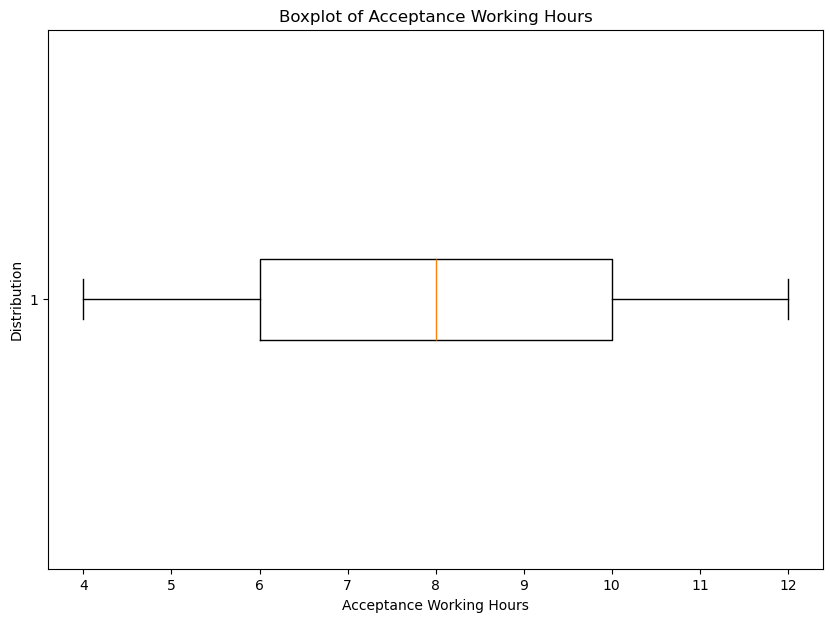

In [30]:
#normal the working hours intervel [0-24]

normalization_hours= df['Hours working per day']/24

print(df['Hours working per day'].describe())

fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.boxplot(df['Hours working per day'],vert=False)

# show plot
plt.xlabel('Acceptance Working Hours')  # Naming the x-axis
plt.ylabel('Distribution')  # Naming the y-axis
plt.title('Boxplot of Acceptance Working Hours')

plt.show()

---

## <h3>Type of Certificate</h3>

In [35]:
cert_df = df['certifications']

print(df['certifications'].unique())

cert_counts = cert_df.value_counts()

# Print the counts of each certification type
print(cert_counts)

['shell programming' 'machine learning' 'app development' 'python'
 'r programming' 'information security' 'hadoop' 'distro making'
 'full stack']
certifications
r programming           2275
machine learning        2255
shell programming       2252
information security    2250
full stack              2239
hadoop                  2210
python                  2198
app development         2165
distro making           2156
Name: count, dtype: int64


# **Data Preprocessing**

In [14]:
# check dimensionality
print("Number of rows:", df.shape[0])
print("Number of features/columns:", df.shape[1])

Number of rows: 20000
Number of features/columns: 40


In [15]:
df.dtypes

Unnamed: 0                               int64
Percentage in Operating Systems          int64
Percentage in Algorithms                 int64
Percentage in Programming Concepts       int64
Percentage in Software Engineering       int64
Percentage in Computer Networks          int64
Percentage in Electronics Subjects       int64
Percentage in Computer Architecture      int64
Percentage in Mathematics                int64
Percentage in Communication skills       int64
Hours working per day                    int64
Logical quotient rating                  int64
hackathons                               int64
coding skills rating                     int64
public speaking points                   int64
can work long time before system?       object
self-learning capability?               object
Extra-courses did                       object
certifications                          object
workshops                               object
talenttests taken?                      object
olympiads    

In [16]:
df.isna().sum()

Unnamed: 0                             0
Percentage in Operating Systems        0
Percentage in Algorithms               0
Percentage in Programming Concepts     0
Percentage in Software Engineering     0
Percentage in Computer Networks        0
Percentage in Electronics Subjects     0
Percentage in Computer Architecture    0
Percentage in Mathematics              0
Percentage in Communication skills     0
Hours working per day                  0
Logical quotient rating                0
hackathons                             0
coding skills rating                   0
public speaking points                 0
can work long time before system?      0
self-learning capability?              0
Extra-courses did                      0
certifications                         0
workshops                              0
talenttests taken?                     0
olympiads                              0
reading and writing skills             0
memory capability score                0
Interested subje

In [17]:
df.describe()

,Unnamed: 0,Percentage in Operating Systems,Percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,Logical quotient rating,hackathons,coding skills rating,public speaking points,Academic Normalize
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,9999.500000,77.002300,76.948200,77.017550,77.094500,76.958200,77.015550,77.069850,76.913100,76.921450,7.985950,4.995050,2.992650,5.004750,5.012800,0.769934
std,5773.647028,10.085697,10.101733,10.134815,10.087837,10.020088,10.168888,10.069059,10.138555,10.103494,2.593798,2.578383,2.005791,2.576831,2.588875,0.033693
min,0.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,4.000000,1.000000,0.000000,1.000000,1.000000,0.644444
25%,4999.750000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,6.000000,3.000000,1.000000,3.000000,3.000000,0.746667
50%,9999.500000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,8.000000,5.000000,3.000000,5.000000,5.000000,0.770000
75%,14999.250000,86.000000,86.000000,86.000000,86.000000,85.000000,86.000000,86.000000,86.000000,86.000000,10.000000,7.000000,5.000000,7.000000,7.000000,0.793333
max,19999.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,12.000000,9.000000,6.000000,9.000000,9.000000,0.892222


---

# **Association Rule Mining**

# **Classfication**

# **Knowledge Evaluation**